In [51]:
import json
from pathlib import Path
import numpy as np
data = json.loads( Path("./mask.json").read_text() )
print(data)


{'Source': {'0': {'vertices': [911.125, 985.625244140625, 908.875, 714.375, 902.125, 612.875122070313, 911.296875, 578.624755859375, 897.75, 430.750061035156, 906.875, 374.500061035156, 894.75, 318.125061035156], 'inTangents': [2, 61.7501220703125, 0.25, 13, -1.25, 6.25, -0.64166259765625, 7.2138671875, -0.25, 9.25006103515625, 0.25, 8, 0, 0], 'outTangents': [-2, -61.750244140625, -0.2554931640625, -13.2852783203125, 1.25, -6.2501220703125, 0.578125, -6.499755859375, 0.25, -9.25, -0.25, -8, 0, 0]}, '56': {'vertices': [913.25, 985.625244140625, 907, 714.375, 900, 612.750122070313, 908.546875, 579.624755859375, 893.875, 433.375091552734, 900.5, 373.875061035156, 887.625, 318.750061035156], 'inTangents': [1.92578125, 61.7528076171875, 0.11260986328125, 13.2872314453125, -0.3975830078125, 6.361328125, -1.203125, 7.249755859375, -0.25, 9.25003051757813, 0.25, 8, 0, 0], 'outTangents': [-1.875, -60.125244140625, -0.125, -14.75, 0.375, -6.0001220703125, 1.203125, -7.249755859375, 0.25, -9.2500

[[911.125      985.62524414]
 [908.875      714.375     ]
 [902.125      612.87512207]
 [911.296875   578.62475586]
 [897.75       430.75006104]
 [906.875      374.50006104]
 [894.75       318.12506104]]


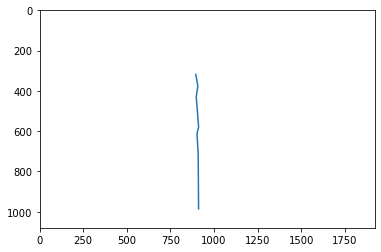

In [53]:
# extract Path at key
vertices = np.array( data['Source']['0']['vertices'] ).reshape( (-1,2) )
print(vertices)

import matplotlib.pyplot as plt
x = vertices[:,0]
y = vertices[:,1]

plt.xlim(0, 1920), plt.ylim(1080, 0)
plt.plot(x, y)

# Linear Interpolation test

In [124]:
# Interpolation
import numpy as np
points = np.random.uniform((0,0),(100,1), (10, 2))
# sort points by x
points = points[points[:,0].argsort()]

import matplotlib.pyplot as plt
plt.scatter(points[:,0], points[:,1], s=100)

t = [f for f in range(0,100,1)]

yinterp = np.interp(t, points[:,0], points[:,1])
plt.plot(t, yinterp, '-x', c="red")

TypeError: _interp_dispatcher() missing 1 required positional argument: 'fp'

# Extract path at arbitary time

164 {'vertices': [321.5, 488.500183105469, 568.500183105469, 448.499938964844, 784.500244140625, 407], 'inTangents': [-114.967742919922, 17.3902587890625, -60.7463989257813, 9.5458984375, -81.000244140625, 19.5], 'outTangents': [119, -18.0001831054688, 69.9996948242188, -10.9999389648438, 171.466430664063, -41.2788391113281]}
169 {'vertices': [324, 491.000183105469, 571.000183105469, 450.999938964844, 787.000305175781, 409.499969482422], 'inTangents': [-114.967727661133, 17.3902587890625, -60.7463989257813, 9.5458984375, -81.0003051757813, 19.5000305175781], 'outTangents': [119, -18.0001831054688, 69.9996948242188, -10.9999694824219, 171.466369628906, -41.2788391113281]}
171 {'vertices': [329.527282714844, 490.702026367188, 585.7841796875, 443.705810546875, 784.4345703125, 415.945739746094], 'inTangents': [-115.047576904297, 15.3201904296875, -49.2841796875, 12.294189453125, -166.4345703125, 36.5542602539063], 'outTangents': [211.972717285156, -27.2020263671875, 45.2445068359375, -11.2

In [108]:
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
plt.close()
ax.set_xlim(0,6)
ax.set_ylim(-1,1)
# h = ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))
ani

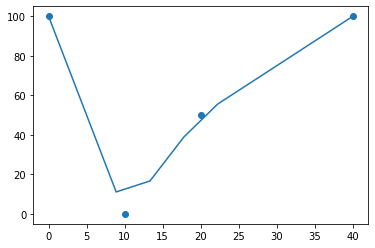

In [128]:
class AnimationCurve:
    def __init__(self, frames, values):
        self.frames = frames
        self.values = values

    def getValueAtFrame(self, frame):
        return np.interp([frame], self.frames, self.values)

import matplotlib.pyplot as plt
frames = [0,10,20,40]
values = [100, 0, 50, 100]
plt.scatter(frames, values)
animCurve = AnimationCurve(frames, values)
plt.plot(np.linspace(0, 40, 10), [animCurve.getValueAtFrame(f) for f in np.linspace(0, 40, 10)])


In [118]:
import json
from pathlib import Path as FilePath
import numpy as np
from bezierpath import Path as BezierPath
import pandas as pd
from functools import reduce
def getAnimationData(mask, vertex, key='vertices', xy=0):
    # create columns
    vertex_count = int( len( list(mask.values())[0]['vertices'])/2 )
    columns = []
    for i in range(vertex_count):
        columns.append('in.{}.x'.format(i))
        columns.append('in.{}.y'.format(i))
        columns.append('pos.{}.x'.format(i))
        columns.append('pos.{}.y'.format(i))
        columns.append('out.{}.x'.format(i))
        columns.append('out.{}.y'.format(i))
    
    # create dataframe
    df = pd.DataFrame(columns=columns)
    df.index.name="frame"

    # populate rows
    for frame in mask.keys():
        row = []
        for i in range(vertex_count):
            row.append(mask[frame]['inTangents'][i*2+0])
            row.append(mask[frame]['inTangents'][i*2+1])
            row.append(mask[frame]['vertices'][i*2+0])
            row.append(mask[frame]['vertices'][i*2+1])
            row.append(mask[frame]['outTangents'][i*2+0])
            row.append(mask[frame]['outTangents'][i*2+1])
        df.loc[frame] = row

    # return animation dataframe
    return df

ae_data = json.loads( FilePath("./footage/MAH00073.MP4-mask.json").read_text() )
animationData = getAnimationData(ae_data['Mask 1'], 2)
animationData

,in.0.x,in.0.y,pos.0.x,pos.0.y,out.0.x,out.0.y,in.1.x,in.1.y,pos.1.x,pos.1.y,out.1.x,out.1.y,in.2.x,in.2.y,pos.2.x,pos.2.y,out.2.x,out.2.y
frame,,,,,,,,,,,,,,,,,,
164,-114.967743,17.390259,321.500000,488.500183,119.000000,-18.000183,-60.746399,9.545898,568.500183,448.499939,69.999695,-10.999939,-81.000244,19.500000,784.500244,407.000000,171.466431,-41.278839
169,-114.967728,17.390259,324.000000,491.000183,119.000000,-18.000183,-60.746399,9.545898,571.000183,450.999939,69.999695,-10.999969,-81.000305,19.500031,787.000305,409.499969,171.466370,-41.278839
171,-115.047577,15.320190,329.527283,490.702026,211.972717,-27.202026,-49.284180,12.294189,585.784180,443.705811,45.244507,-11.286438,-166.434570,36.554260,784.434570,415.945740,173.648682,-30.292999
173,-115.127457,13.250153,335.054596,490.403870,219.445404,-16.403870,-70.368652,9.670410,592.568237,419.411621,53.931763,-7.411591,-136.368530,32.108459,781.868713,421.891541,173.272644,-31.949158
176,-115.247192,10.145081,343.345490,489.956604,159.654510,-6.456604,-73.743774,5.779785,566.743774,388.720215,87.423157,-6.851929,-123.020020,34.439850,760.520020,425.560150,172.708618,-34.433380
178,-115.326996,8.075043,346.372742,489.658417,151.127228,-5.658417,-78.741943,7.859833,566.741882,369.640167,88.258118,-8.713654,-120.490112,34.279907,748.239990,431.220093,172.332520,-36.089600
180,-115.406830,6.005035,349.400024,489.360229,142.599976,-4.860229,-83.740051,9.939911,550.740051,358.560089,89.093201,-10.575317,-117.960083,34.119965,735.959961,436.880066,171.956421,-37.745758
181,-115.446747,4.969971,351.800018,489.048828,137.299896,-4.140137,-92.719177,6.011078,561.651367,351.162903,87.348694,-5.662903,-123.605713,35.897095,728.748413,437.460052,171.768555,-38.573822
182,-115.475281,4.438171,356.783386,488.737427,132.783203,-3.964996,-92.599304,7.175903,558.062805,346.015747,78.937195,-5.515747,-139.370361,40.876587,720.370361,439.123413,171.580444,-39.401947


In [136]:
def interpolateAtFrame(df, column, frame):
    frames = [int(key) for key in df.index]
    columns = df.columns

    interp = pd.DataFrame(columns=columns)
    interp.index.name=df.index.name
    interp.loc[frame] = [np.interp(frame, df.index, df[col]) for col in columns]
    return interp
        
interpolateAtFrame(animationData, 'pos.0.x', 200)

,in.0.x,in.0.y,pos.0.x,pos.0.y,out.0.x,out.0.y,in.1.x,in.1.y,pos.1.x,pos.1.y,out.1.x,out.1.y,in.2.x,in.2.y,pos.2.x,pos.2.y,out.2.x,out.2.y
frame,,,,,,,,,,,,,,,,,,
200,-115.965576,-8.485229,447.571429,485.857195,164.0,12.000096,-102.469134,18.016671,575.428571,326.714286,99.568839,-17.446838,-156.14284,47.857016,703.571411,462.857274,168.625227,-51.667127
